#Import Library

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader
from torchvision import datasets

import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score


#Loading MNIST Datasets

memanggil dataset MNIST yang tersimpan dalam library **torch**. dan mengubah data gambar menjadi sebuah tensor menggunakan fungsi **transforms**.

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_data = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 227917020.68it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 61930313.82it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 55448674.67it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 14302198.77it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Menggunakan fungsi **DataLoader** untuk memanggil data gambar kita menjadi sebuah batch.

In [ ]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=100, shuffle=False)

#Visualizing MNIST Dataset

Menampilakan batch pertama dari MNIST dataset yang telah di load sebelumnya.

In [ ]:
from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))

In [ ]:
for images, labels in train_loader:
  break

Labels:  [   5    5    7    3    2    1    4    1    4    7    5    7    9    9
    1    7    9    6    3    8    8    9    6    8    9    6    0    4
    4    1    9    7    4    2    9    0    5    7    4    7    7    8
    2    8    7    7    4    6    1    4    8    2    3    3    7    9
    8    9    6    4    3    4    2    0    3    6    5    6    4    6
    2    8    8    2    4    9    2    6    2    7    2    6    1    1
    9    8    3    6    5    4    2    7    0    1    6    9    8    9
    7    9]


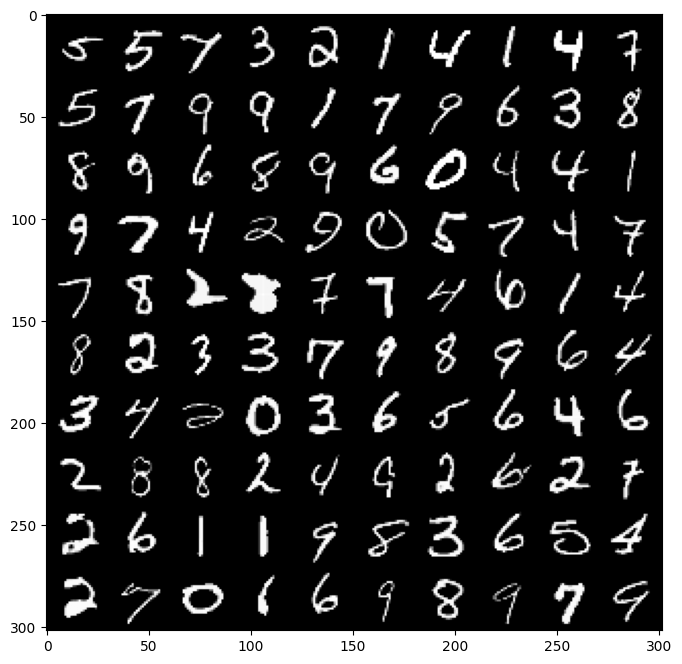

In [ ]:
print('Labels: ', labels[:100].numpy())

im = make_grid(images[:100], nrow=10)
plt.figure(figsize=(10, 8))

plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))

#Neural Network Design

Model Neural Network ini dirancang dengan menggunakan model **linear** dengan ukuran layer 28*28 (784) >> 128 >> 64 >> 10. dimana 784 merupakan input layer dan 10 merupakan output layer.

Dimana Activation function yang digunakan adalah **ReLu** untuk antar layer dan **sigmoid function** sebagai output layer.

In [ ]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.encoder1 = nn.Linear(28 * 28, 128)
        self.encoder2 = nn.Linear(128, 64)
        self.encoder3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  #Mengubah dimensi gambar inputan (Melakukan reshape terhadap gambar input)
        x = F.relu(self.encoder1(x))
        x = F.relu(self.encoder2(x))
        x = F.sigmoid(self.encoder3(x))
        return x

model = Model()


#Set Hyperparameters

Pada model ini menggunakan loss function yaitu CrossEntropy dan Adam optimizer sebagai Optimizernya dengan learning rate yang digunakan adalah 0.001.

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

#Training Loop MNIST Datasets

Untuk melakukan pelatihan, dilakukan pelatihan sebanyak 10 epoch, dimana gambar yang masuk ke dalam model akan dihitung lossnya menggunakan **creation** yang telah dibuat sebelumnya. dan tiap 200 batch akan dicatat hasilnya. Dan juga menggunakan fungsi time() untuk menghitung waktu yang diperlukan untuk melakukan pelatihan.

In [ ]:
import time
start_time = time.time()

losses = []

for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        if i%200 == 0:
          print(f'Epoch : {epoch}, batch : {i}, loss : {loss.item()}')
        losses.append(loss.detach().numpy())

print('Finished Training')
total_time = time.time() - start_time
print(f'Duration: {total_time/60} mins')

Epoch : 0, batch : 0, loss : 2.3072595596313477
Epoch : 0, batch : 200, loss : 1.6011563539505005
Epoch : 0, batch : 400, loss : 1.5776336193084717
Epoch : 1, batch : 0, loss : 1.5188870429992676
Epoch : 1, batch : 200, loss : 1.5470601320266724
Epoch : 1, batch : 400, loss : 1.562771201133728
Epoch : 2, batch : 0, loss : 1.4947773218154907
Epoch : 2, batch : 200, loss : 1.5306373834609985
Epoch : 2, batch : 400, loss : 1.5727592706680298
Epoch : 3, batch : 0, loss : 1.500943899154663
Epoch : 3, batch : 200, loss : 1.4869495630264282
Epoch : 3, batch : 400, loss : 1.4931837320327759
Epoch : 4, batch : 0, loss : 1.510163426399231
Epoch : 4, batch : 200, loss : 1.533776879310608
Epoch : 4, batch : 400, loss : 1.5016682147979736
Epoch : 5, batch : 0, loss : 1.4923442602157593
Epoch : 5, batch : 200, loss : 1.5117509365081787
Epoch : 5, batch : 400, loss : 1.5415468215942383
Epoch : 6, batch : 0, loss : 1.4878849983215332
Epoch : 6, batch : 200, loss : 1.4758044481277466
Epoch : 6, batch :

#Evaluate Model Neural Network

membuat semua variabel yang diperlukan untuk menampung nilai-nilai yang diperlukan untuk melakukan evaluasi model. selanjutnya melakukan evaluasi data melalui data test. untuk mendapatkan nilai-nilai yang akan mengisi variabel yang telah di defenisikan sebelumnya.

In [ ]:
model.eval()
correct = 0
total = 0
predicted_labels = []
true_labels = []

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        predicted_labels.extend(predicted.numpy())
        true_labels.extend(labels.numpy())

In [ ]:
accuracy = accuracy_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels, average='weighted')
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
confusion = confusion_matrix(true_labels, predicted_labels)

In [ ]:
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print('Confusion Matrix:')
print(confusion)

Accuracy: 96.58%
F1 Score: 0.97
Precision: 0.97
Recall: 0.97
Confusion Matrix:
[[ 968    0    0    0    1    3    6    1    1    0]
 [   0 1124    2    1    0    1    3    1    3    0]
 [  15    3  971    3    7    1    6   12   14    0]
 [   0    1    8  960    1   18    1   12    9    0]
 [   1    0    2    0  966    0    4    2    0    7]
 [   6    1    0    5    2  858    9    1    6    4]
 [   5    2    0    1   10    4  931    0    5    0]
 [   2    9   10    1   13    0    0  981    1   11]
 [   6    0    1    2    8    7    3    4  939    4]
 [   5    3    0    3   29    3    1    4    1  960]]


Dari hasil evaluasi model tersebut dapat kita lihat bahwasanya model yang telah dibangun sebelumnya memiliki performa yang sangat baik dengan tingkat akurasi di 96.58% yang artinya model akan dapat melakukan prediksi tulisan tangan angka dengan sangat baik. Dan hal ini juga di dukung dengan tingginya nilai-nilai F1-score, Precision, dan Recall yang dimiliki oleh model ini.